<a href="https://colab.research.google.com/github/SanikaaG/Email-spam-classification/blob/main/email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_mail_data = pd.read_csv('/content/spam_ham_dataset.csv')

# New Section

In [ ]:
print(raw_mail_data)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [ ]:
X = raw_mail_data['text']

Y = raw_mail_data['label_num']

In [ ]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [ ]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(1551,)
(3620,)


In [ ]:
print(X_train)

3054    Subject: enron / hpl actuals for december 7 , ...
4226    Subject: exxonmobil beaumont refinery fuel nee...
3297    Subject: cornhusker\r\ndaren - - - ( re : the ...
756     Subject: get back to me please\r\nonce south c...
4999    Subject: cutoff for processing invoices and ex...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 1551, dtype: object


In [ ]:
print(Y_train)

3054    0
4226    0
3297    0
756     1
4999    0
       ..
789     1
968     1
1667    0
3321    0
1688    1
Name: label_num, Length: 1551, dtype: int64


In [ ]:
print(Y_test)

4020    1
3561    1
3434    0
111     0
1126    0
       ..
2718    1
1805    0
5165    0
5120    1
3269    0
Name: label_num, Length: 3620, dtype: int64


In [ ]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(Y_train.astype('int'))

3054    0
4226    0
3297    0
756     1
4999    0
       ..
789     1
968     1
1667    0
3321    0
1688    1
Name: label_num, Length: 1551, dtype: int64


In [ ]:
print('Number of rows in the total set: {}'.format(raw_mail_data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5171
Number of rows in the training set: 1551
Number of rows in the test set: 3620


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train).toarray()

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test).toarray()

In [ ]:
print(training_data)

[[0 2 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with the training data
model.fit(training_data, Y_train)

LogisticRegression()

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(training_data)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(testing_data)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9646408839779006


In [ ]:
print('Precision score: ', format(precision_score(Y_test, prediction_on_test_data)))
print('Recall score: ', format(recall_score(Y_test, prediction_on_test_data)))
print('F1 score: ', format(f1_score(Y_test, prediction_on_test_data)))

Precision score:  0.9210526315789473
Recall score:  0.9611742424242424
F1 score:  0.9406858202038925


In [ ]:
raw_mail_data['label_num'] = raw_mail_data['label'].apply(lambda x:1 if x == 'spam' else 0)
raw_mail_data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [ ]:
clf.predict(emails)

array([0, 1])

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction_on_test_data)
print(confusion_matrix)

[[2477   87]
 [  41 1015]]


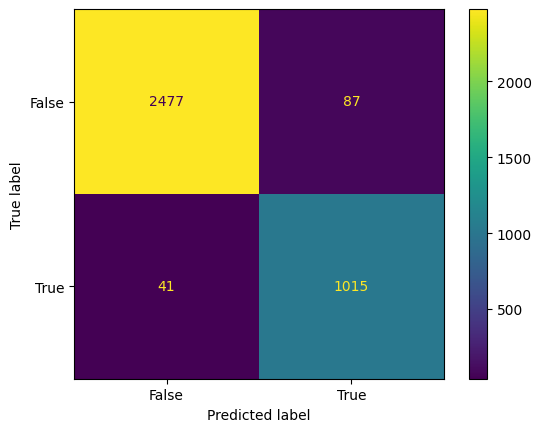

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()